# Amazon

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_rows', 5)

## Load Data and Check

In [4]:
df_alexa = pd.read_csv('amazon.tsv', sep='\t')

In [5]:
df_alexa

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
...,...,...,...,...,...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


## Data Exploration

In [7]:
df_alexa['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
                              ...                        
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [8]:
positive = df_alexa[df_alexa['feedback'] == 1]
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
...,...,...,...,...,...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [9]:
positive.shape

(2893, 5)

In [10]:
negative = df_alexa[df_alexa['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
...,...,...,...,...,...
3091,1,30-Jul-18,Black Dot,I didn’t order it,0
3096,1,30-Jul-18,White Dot,The product sounded the same as the emoji spea...,0


In [11]:
negative.shape

(257, 5)

<Axes: xlabel='feedback', ylabel='count'>

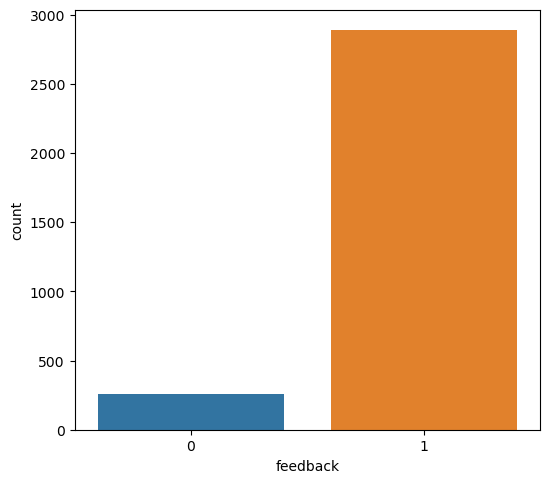

In [12]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'feedback', data = df_alexa)

<Axes: xlabel='rating', ylabel='count'>

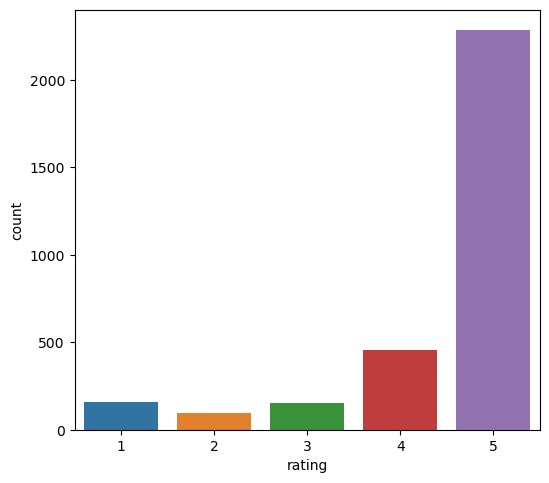

In [13]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'rating', data = df_alexa)

<Axes: >

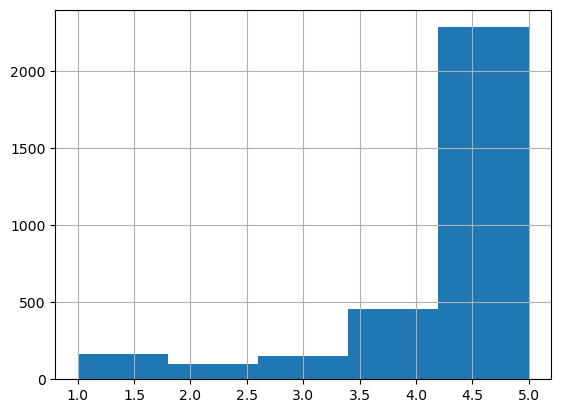

In [14]:
df_alexa['rating'].hist(bins = 5)

<Axes: xlabel='variation', ylabel='rating'>

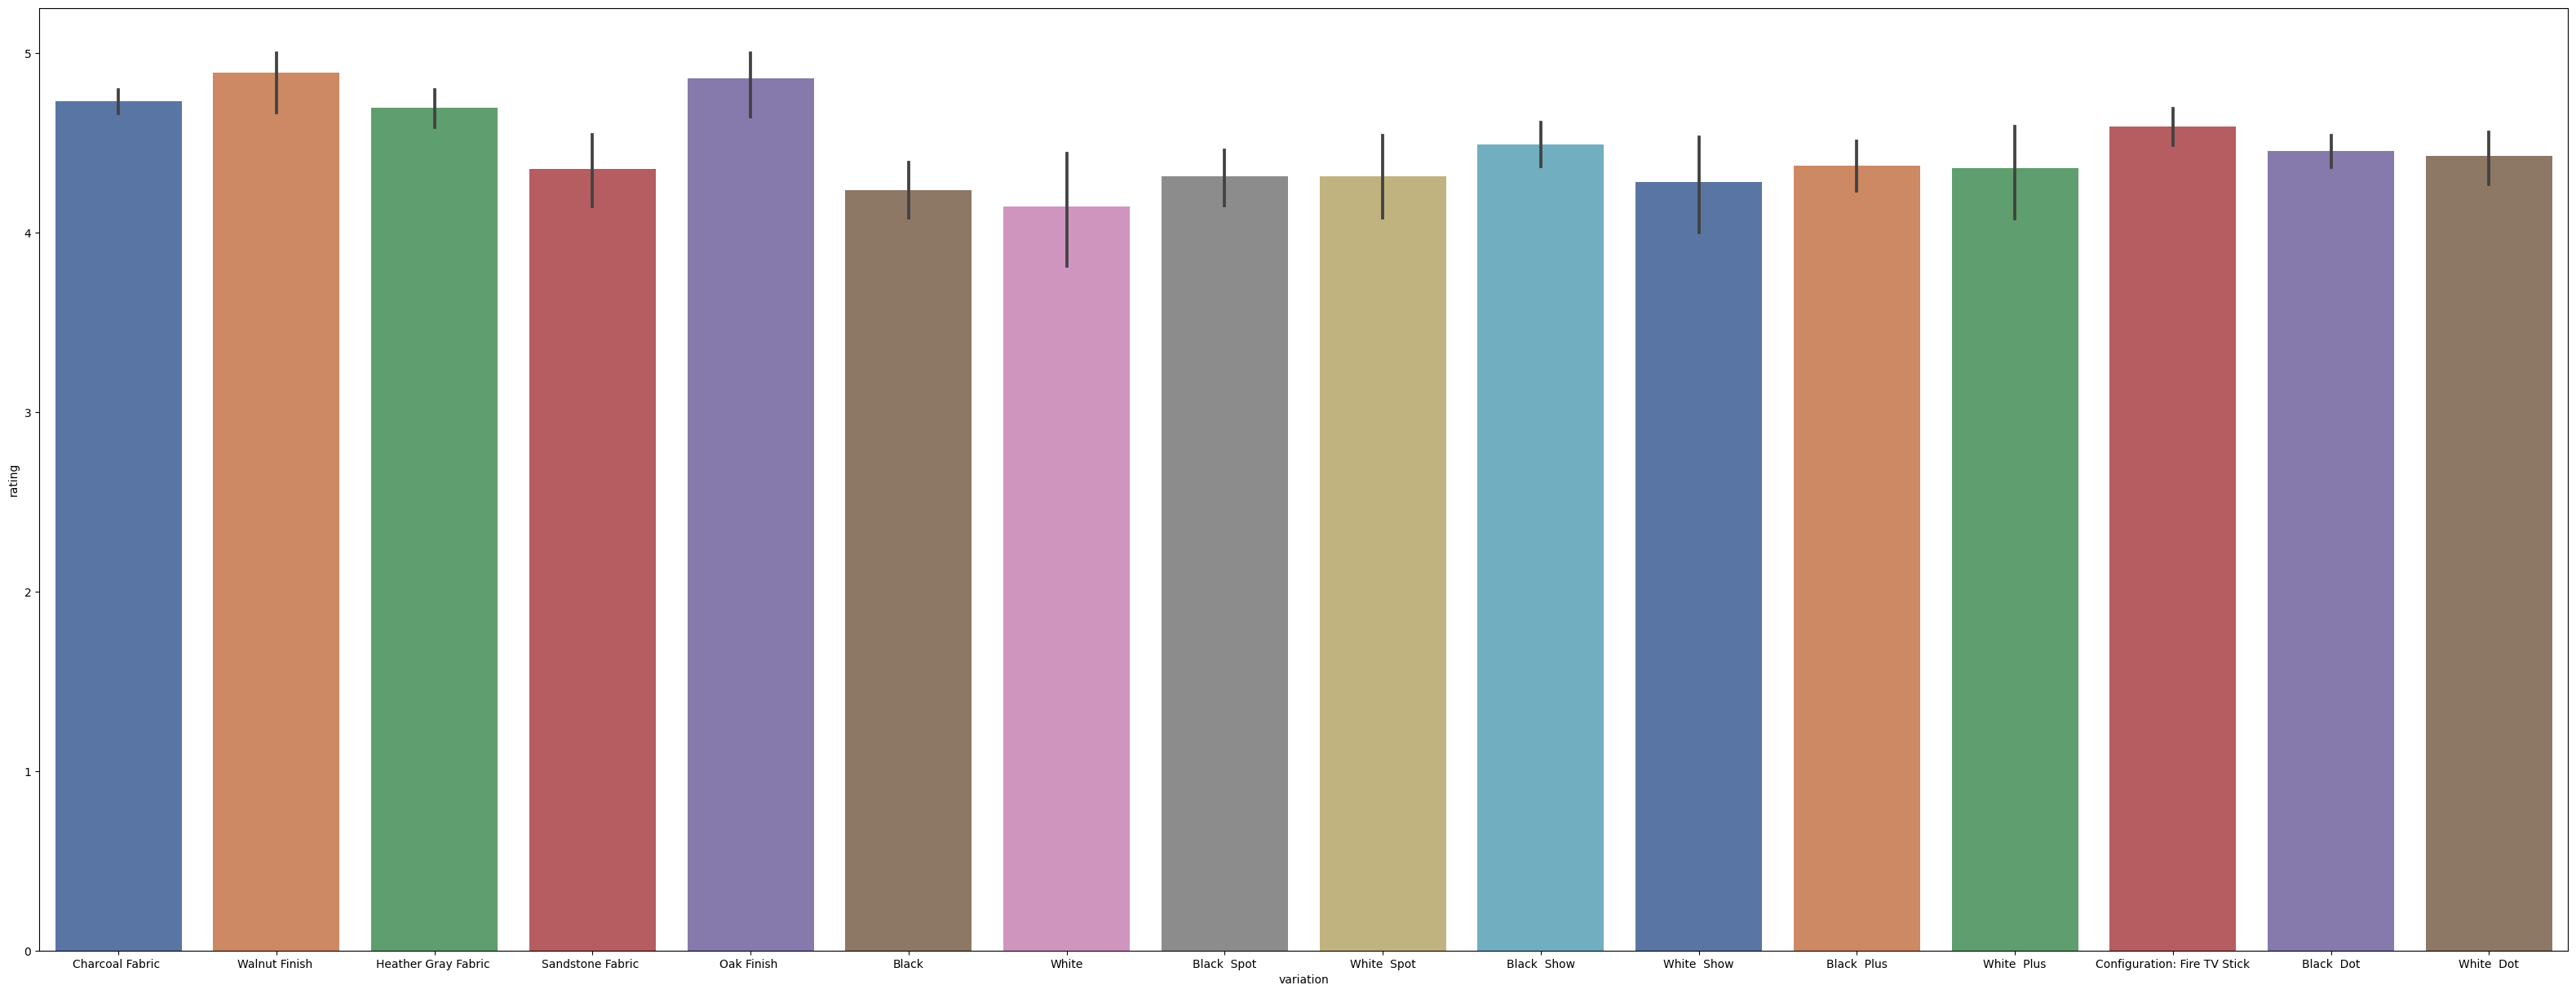

In [15]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y='rating', data=df_alexa, palette = 'deep')

## Cleaning Data

In [17]:
df_alexa = df_alexa.drop(['date', 'rating'],axis=1)
df_alexa

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
...,...,...,...
3148,White Dot,Only complaint I have is that the sound qualit...,1
3149,Black Dot,Good,1


In [18]:
variation_dummies = pd.get_dummies(df_alexa['variation'], drop_first = True)
df_integer = variation_dummies.astype(int)
df_integer

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3149,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df_alexa.drop(['variation'], axis=1, inplace=True)
df_alexa = pd.concat([df_alexa, df_integer], axis=1)
df_alexa

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3149,Good,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
df_alexa['verified_reviews'].fillna('', inplace=True)

In [21]:
vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])

In [22]:
alexa_countvectorizer.shape

(3150, 4044)

In [23]:
type(alexa_countvectorizer)

scipy.sparse._csr.csr_matrix

In [24]:
print(vectorizer.get_feature_names_out())

['00' '000' '07' ... 'zzzz' 'zzzzzzz' 'útil']


In [25]:
print(alexa_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
df_alexa.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(alexa_countvectorizer.toarray())

In [27]:
df_alexa = pd.concat([df_alexa, reviews], axis=1)

In [28]:
df_alexa

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3149,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X = df_alexa.drop(['feedback'],axis=1)

In [30]:
#X = pd.DataFrame(alexa_countvectorizer.toarray())

In [31]:
X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3149,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y = df_alexa['feedback']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

## Machine Learning

In [35]:
randomforest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [36]:
y_predict_train = randomforest_classifier.predict(X_train)

<Axes: >

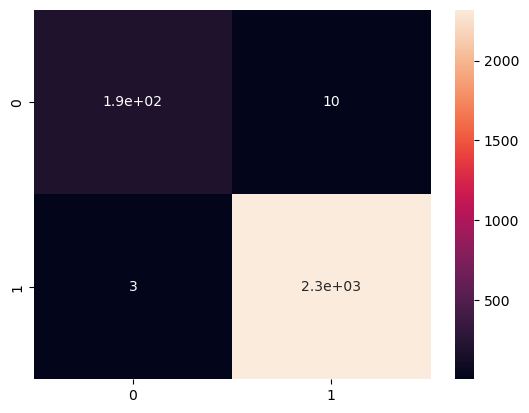

In [37]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [38]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       198
           1       1.00      1.00      1.00      2322

    accuracy                           0.99      2520
   macro avg       0.99      0.97      0.98      2520
weighted avg       0.99      0.99      0.99      2520



In [39]:
y_predict = randomforest_classifier.predict(X_test)

<Axes: >

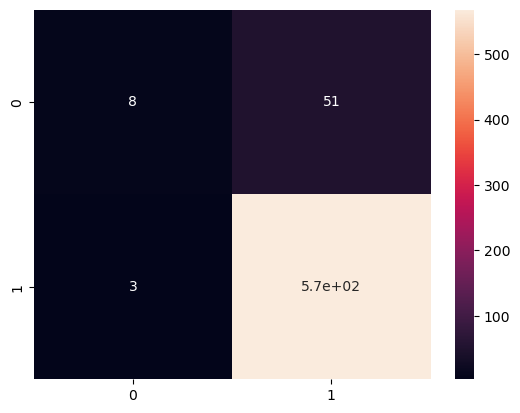

In [40]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [41]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.14      0.23        59
           1       0.92      0.99      0.95       571

    accuracy                           0.91       630
   macro avg       0.82      0.57      0.59       630
weighted avg       0.90      0.91      0.89       630



### Refine the Model

In [43]:
df_alexa = pd.read_csv('amazon.tsv', sep='\t')
df_alexa = pd.concat([df_alexa, pd.DataFrame(alexa_countvectorizer.toarray())], axis = 1)
df_alexa

,rating,date,variation,verified_reviews,feedback,0,1,2,3,4,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3149,4,29-Jul-18,Black Dot,Good,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_alexa['verified_reviews'] = df_alexa['verified_reviews'].astype(str)
df_alexa['length'] = df_alexa['verified_reviews'].apply(len)

In [45]:
X = df_alexa.drop(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], axis = 1)
X

,0,1,2,3,4,5,6,7,8,9,...,4035,4036,4037,4038,4039,4040,4041,4042,4043,length
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,380
3149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [46]:
y = df_alexa['feedback']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [48]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [49]:
randomforest_classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [50]:
y_predict_train = randomforest_classifier.predict(X_train)

<Axes: >

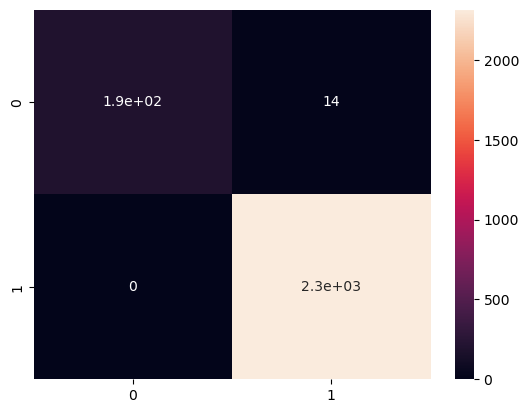

In [51]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [52]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       206
           1       0.99      1.00      1.00      2314

    accuracy                           0.99      2520
   macro avg       1.00      0.97      0.98      2520
weighted avg       0.99      0.99      0.99      2520



In [53]:
y_predict = randomforest_classifier.predict(X_test)

<Axes: >

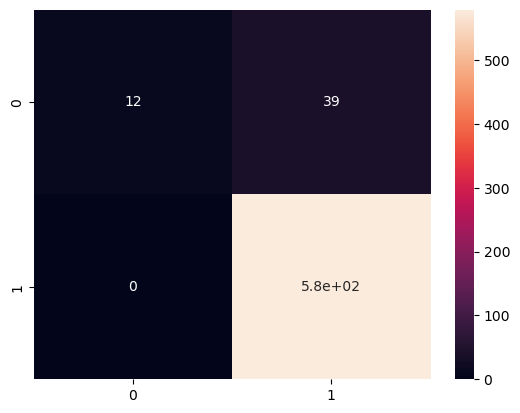

In [54]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [55]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.24      0.38        51
           1       0.94      1.00      0.97       579

    accuracy                           0.94       630
   macro avg       0.97      0.62      0.67       630
weighted avg       0.94      0.94      0.92       630

